In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.rcParams['text.color'] = 'black'

from sklearn.metrics.cluster import homogeneity_score

In [201]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [202]:
df.head(2)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                           0.00                                 0.00   
1                           0.00                                 0.00   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                 0.00   
1                                 0.00   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                               0.00       
1                                               0.00       

   CATEGORÍA_Ferreteria      CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                  0.00                 1.00                             0.00   
1                  0.00                 1.00                             0.00   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                         0.00   
1                                         0.00   

   SUBCATEGORÍA_Alimentos preparados y conservados  \
0                                             0.00   
1                                             0.00   

   SUBCATEGORÍA_Elementos de aseo y limpieza   SUBCATEGORÍA_Otros  \
0                                       0.00                 1.00   
1                                       0.00                 1.00   

   SUBCATEGORÍA_Seguridad y protección personal      PROVEEDOR_Otros  \
0                                          0.00                 1.00   
1                                          0.00                 1.00   

   PROVEEDOR_Proveedor 28  PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
0                    0.00                     0.00                    0.00   
1                    0.00                     0.00                    0.00   

     PRESUPUESTO_Otros  PRESUPUESTO_Presupuesto 711  \
0                 1.00                         0.00   
1                 1.00                         0.00   

   PRESUPUESTO_Presupuesto 719  COMPAÑÍA_COMPRADORA_Otros  \
0                         0.00                       0.00   
1                         0.00                       0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 1  \
0                                    1.00   
1                                    1.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 2  \
0                                    0.00   
1                                    0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 24  \
0                                     0.00   
1                                     0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 29     ESTADO_Cancelado  \
0                                     0.00                 0.00   
1                                     0.00                 0.00   

        ESTADO_Enviado  ESTADO_Finalizado Incompleto  ESTADO_Orden Confirmada  \
0                 0.00                          0.00                     0.00   
1                 0.00                          0.00                     0.00   

   ESTADO_Orden Rechazada  ESTADO_Orden en Proceso  \
0                    0.00                     1.00   
1                    0.00                     0.00   

   ESTADO_Pendiente por Aprobar      ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                          0.00                 0.00                     0.00   
1                          0.00                 1.00                     0.00   

         NÚMERO_PEDIDO         ORDEN_NÚMERO      CANTIDAD_PEDIDA  \
0                 0.60                 0.03                 0.00   
1                 0.02                 0.00                 0.00   

     CANTIDAD_RECIBIDA      PRECIO_UNITARIO  PRECIO_UNITARIO_+_IVA  \
0                 0.00                 0.28                   0.33   
1                 0.00                 0.51                   0.60   

                   IVA          TOTAL_+_IVA     DURACIÓN_ENTREGA  \
0                 0.05                 0.67                 0.00   
1                 0.10                 0.60                 0.00   

   DURACIÓN_APROBACIÓN

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Alimentos preparados y conservado

## DROP SOME COLUMNS

In [204]:
cols_to_drop = ['DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'PRECIO_UNITARIO_+_IVA', 
                'PRESUPUESTO_Otros', 'PRESUPUESTO_Presupuesto 711', 'PRESUPUESTO_Presupuesto 719', 
                'SUBCATEGORÍA_Alimentos preparados y conservados', 'SUBCATEGORÍA_Elementos de aseo y limpieza', 'SUBCATEGORÍA_Otros'
                
               ]

In [205]:
cols_to_drop

['DURACIÓN_ENTREGA',
 'DURACIÓN_APROBACIÓN',
 'PRECIO_UNITARIO_+_IVA',
 'PRESUPUESTO_Otros',
 'PRESUPUESTO_Presupuesto 711',
 'PRESUPUESTO_Presupuesto 719',
 'SUBCATEGORÍA_Alimentos preparados y conservados',
 'SUBCATEGORÍA_Elementos de aseo y limpieza',
 'SUBCATEGORÍA_Otros']

In [206]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 34 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Seguridad y protección personal  

In [208]:
df.head(3)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                           0.00                                 0.00   
1                           0.00                                 0.00   
2                           1.00                                 0.00   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                 0.00   
1                                 0.00   
2                                 0.00   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                               0.00       
1                                               0.00       
2                                               0.00       

   CATEGORÍA_Ferreteria      CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                  0.00                 1.00                             0.00   
1                  0.00                 1.00                             0.00   
2                  0.00                 0.00                             0.00   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                         0.00   
1                                         0.00   
2                                         0.00   

   SUBCATEGORÍA_Seguridad y protección personal      PROVEEDOR_Otros  \
0                                          0.00                 1.00   
1                                          0.00                 1.00   
2                                          0.00                 1.00   

   PROVEEDOR_Proveedor 28  PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
0                    0.00                     0.00                    0.00   
1                    0.00                     0.00                    0.00   
2                    0.00                     0.00                    0.00   

   COMPAÑÍA_COMPRADORA_Otros  COMPAÑÍA_COMPRADORA_Portal comprador 1  \
0                       0.00                                    1.00   
1                       0.00                                    1.00   
2                       0.00                                    1.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 2  \
0                                    0.00   
1                                    0.00   
2                                    0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 24  \
0                                     0.00   
1                                     0.00   
2                                     0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 29     ESTADO_Cancelado  \
0                                     0.00                 0.00   
1                                     0.00                 0.00   
2                                     0.00                 0.00   

        ESTADO_Enviado  ESTADO_Finalizado Incompleto  ESTADO_Orden Confirmada  \
0                 0.00                          0.00                     0.00   
1                 0.00                          0.00                     0.00   
2                 0.00                          0.00                     0.00   

   ESTADO_Orden Rechazada  ESTADO_Orden en Proceso  \
0                    0.00                     1.00   
1                    0.00                     0.00   
2                    0.00                     1.00   

   ESTADO_Pendiente por Aprobar      ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                          0.00                 0.00                     0.00   
1                          0.00                 1.00                     0.00   
2                          0.00                 0.00                     0.00   

         NÚMERO_PEDIDO         ORDEN_NÚMERO      CANTIDAD_PEDIDA  \
0                 0.60                 0.03                 0.00   
1                 0.02                 0.00                 0.00   
2                 0.30                 0.02                 0.00   

     CANTIDAD_RECIBIDA      PRECIO_UNITARIO                  IVA  \
0                 0.00                 0

# CLUSTERING

In [209]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [210]:
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

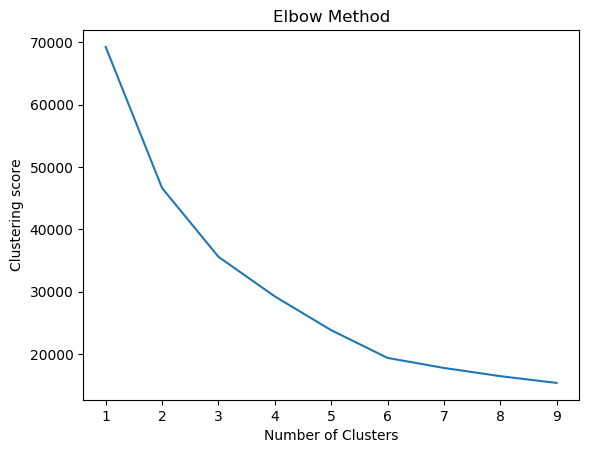

In [211]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [212]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [213]:
df.head()

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                           0.00                                 0.00   
1                           0.00                                 0.00   
2                           1.00                                 0.00   
3                           1.00                                 0.00   
4                           0.00                                 0.00   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                 0.00   
1                                 0.00   
2                                 0.00   
3                                 0.00   
4                                 0.00   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                               0.00       
1                                               0.00       
2                                               0.00       
3                                               0.00       
4                                               0.00       

   CATEGORÍA_Ferreteria      CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                  0.00                 1.00                             0.00   
1                  0.00                 1.00                             0.00   
2                  0.00                 0.00                             0.00   
3                  0.00                 0.00                             0.00   
4                  0.00                 1.00                             0.00   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                         0.00   
1                                         0.00   
2                                         0.00   
3                                         0.00   
4                                         0.00   

   SUBCATEGORÍA_Seguridad y protección personal      PROVEEDOR_Otros  \
0                                          0.00                 1.00   
1                                          0.00                 1.00   
2                                          0.00                 1.00   
3                                          0.00                 1.00   
4                                          0.00                 1.00   

   PROVEEDOR_Proveedor 28  PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
0                    0.00                     0.00                    0.00   
1                    0.00                     0.00                    0.00   
2                    0.00                     0.00                    0.00   
3                    0.00                     0.00                    0.00   
4                    0.00                     0.00                    0.00   

   COMPAÑÍA_COMPRADORA_Otros  COMPAÑÍA_COMPRADORA_Portal comprador 1  \
0                       0.00                                    1.00   
1                       0.00                                    1.00   
2                       0.00                                    1.00   
3                       0.00                                    0.00   
4                       1.00                                    0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 2  \
0                                    0.00   
1                                    0.00   
2                                    0.00   
3                                    1.00   
4                                    0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 24  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 29     ESTADO_Cancelado  \
0                                     0.00                 0.00   
1                                     0.00                 0.00   
2                                     0.00                 0.00   
3          

## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [214]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                           0.74                                 0.04   
1                           0.00                                 0.00   
2                           0.01                                 0.02   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                 0.05   
1                                 0.00   
2                                 0.44   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                               0.10       
1                                              -0.00       
2                                               0.04       

   CATEGORÍA_Ferreteria      CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                  0.00                 0.06                             0.01   
1                 -0.00                -0.00                             0.00   
2                  0.10                 0.28                             0.04   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                         0.01   
1                                         1.00   
2                                         0.07   

   SUBCATEGORÍA_Seguridad y protección personal      PROVEEDOR_Otros  \
0                                          0.01                 1.00   
1                                          1.00                 0.00   
2                                          0.07                 0.62   

   PROVEEDOR_Proveedor 28  PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
0                    0.00                    -0.00                    0.00   
1                    0.00                     1.00                   -0.00   
2                    0.18                    -0.00                    0.20   

   COMPAÑÍA_COMPRADORA_Otros  COMPAÑÍA_COMPRADORA_Portal comprador 1  \
0                       0.26                                    0.01   
1                       0.00                                   -0.00   
2                       0.11                                    0.84   

   COMPAÑÍA_COMPRADORA_Portal comprador 2  \
0                                    0.38   
1                                   -0.00   
2                                    0.05   

   COMPAÑÍA_COMPRADORA_Portal comprador 24  \
0                                    -0.00   
1                                     1.00   
2                                    -0.00   

   COMPAÑÍA_COMPRADORA_Portal comprador 29     ESTADO_Cancelado  \
0                                     0.36                 0.07   
1                                     0.00                 0.00   
2                                     0.00                 0.06   

        ESTADO_Enviado  ESTADO_Finalizado Incompleto  ESTADO_Orden Confirmada  \
0                 0.00                          0.04                     0.00   
1                 0.00                          0.00                    -0.00   
2                 0.00                          0.07                    -0.00   

   ESTADO_Orden Rechazada  ESTADO_Orden en Proceso  \
0                    0.06                     0.49   
1                   -0.00                    -0.00   
2                    0.05                     0.04   

   ESTADO_Pendiente por Aprobar      ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                          0.00                 0.31                     0.01   
1                          0.00                 1.00                     0.00   
2                          0.00                 0.76                     0.00   

         NÚMERO_PEDIDO         ORDEN_NÚMERO      CANTIDAD_PEDIDA  \
0                 0.21                 0.01                 0.00   
1                 0.19                 0.00                 0.00   
2                 0.61                 0.01                 0.00   

     CANTIDAD_RECIBIDA      PRECIO_UNITARIO                  IVA  \
0                 0.00                 0

# DF WITH LABELS OF CLUSTER

In [215]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
2120                            0.00                                 0.00   
10397                           0.00                                 0.00   
11390                           0.00                                 0.00   
19218                           1.00                                 0.00   
17338                           0.00                                 0.00   
11338                           0.00                                 0.00   
4257                            0.00                                 0.00   

       CATEGORÍA_Aseo, Cafetería y Oficina  \
2120                                  0.00   
10397                                 1.00   
11390                                 1.00   
19218                                 0.00   
17338                                 0.00   
11338                                 1.00   
4257                                  1.00   

       CATEGORÍA_Dotación y elementos de protección personal  \
2120                                                0.00       
10397                                               0.00       
11390                                               0.00       
19218                                               0.00       
17338                                               0.00       
11338                                               0.00       
4257                                                0.00       

       CATEGORÍA_Ferreteria      CATEGORÍA_Otros  \
2120                   0.00                 1.00   
10397                  0.00                 0.00   
11390                  0.00                 0.00   
19218                  0.00                 0.00   
17338                  0.00                 0.00   
11338                  0.00                 0.00   
4257                   0.00                 0.00   

       CATEGORÍA_Vehículos y repuestos  \
2120                              0.00   
10397                             0.00   
11390                             0.00   
19218                             0.00   
17338                             0.00   
11338                             0.00   
4257                              0.00   

       CATEGORÍA_Vigilancia y seguridad industrial  \
2120                                          0.00   
10397                                         0.00   
11390                                         0.00   
19218                                         0.00   
17338                                         1.00   
11338                                         0.00   
4257                                          0.00   

       SUBCATEGORÍA_Seguridad y protección personal      PROVEEDOR_Otros  \
2120                                           0.00                 1.00   
10397                                          0.00                 0.00   
11390                                          0.00                 0.00   
19218                                          0.00                 1.00   
17338                                          1.00                 0.00   
11338                                          0.00                 0.00   
4257                                           0.00                 0.00   

       PROVEEDOR_Proveedor 28  PROVEEDOR_Proveedor 301  \
2120                     0.00                     0.00   
10397                    0.00                     0.00   
11390                    1.00                     0.00   
19218                    0.00                     0.00   
17338                    0.00                     1.00   
11338                    1.00                     0.00   
4257                     1.00                     0.00   

       PROVEEDOR_Proveedor 59  COMPAÑÍA_COMPRADORA_Otros  \
2120                     0.00                       0.00   
10397                    1.00                       0.00   
11390                    0.00                       0.00   
19218  

## BRING THE ORIGINAL DF TO ADD CLUSTER LABELS

In [216]:
df_original = pd.read_excel('Proveindustriales_completo.xlsx')

In [217]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original_plus_clusters = df_original
df_original.sample(n=7)

NÚMERO_PEDIDO  ORDEN_NÚMERO                          CATEGORÍA  \
20688            508            31                Alimentos y Bebidas   
18439            991           557                Alimentos y Bebidas   
5479           47456          1343                Alimentos y Bebidas   
12454          40213             3  Vigilancia y seguridad industrial   
12384          40239            19                              Otros   
20877            458           196                Alimentos y Bebidas   
21804            210            74                Alimentos y Bebidas   

                             SUBCATEGORÍA PROVEEDOR      PRESUPUESTO  \
20688                               Otros     Otros            Otros   
18439  Alimentos preparados y conservados     Otros  Presupuesto 711   
5479                                Otros     Otros  Presupuesto 711   
12454     Seguridad y protección personal     Otros            Otros   
12384                               Otros     Otros  Presupuesto 711   
20877                               Otros     Otros  Presupuesto 711   
21804  Alimentos preparados y conservados     Otros  Presupuesto 711   

       COMPAÑÍA_COMPRADORA            ESTADO      CANTIDAD_PEDIDA  \
20688                Otros  Orden en Proceso                 1.00   
18439  Portal comprador 29  Orden en Proceso                90.00   
5479    Portal comprador 2          Recibido                 1.00   
12454                Otros          Recibido               100.00   
12384   Portal comprador 1          Recibido               100.00   
20877  Portal comprador 29  Orden en Proceso                20.00   
21804  Portal comprador 29  Orden en Proceso                30.00   

         CANTIDAD_RECIBIDA  PRECIO_UNITARIO  PRECIO_UNITARIO_+_IVA  IVA  \
20688                 0.00             1000                   1000    0   
18439                 0.00             1155                   1374  219   
5479                  1.00            48536                  48536    0   
12454               100.00            35000                  35000    0   
12384               100.00             1200                   1200    0   
20877                 0.00             1700                   1700    0   
21804                 0.00              646                    769  123   

       TOTAL_+_IVA FECHA_ÚLTIMO_MOVIMIENTO     DURACIÓN_ENTREGA  \
20688         1000              2018-08-27                 3.24   
18439       123660              2019-01-09                 3.24   
5479         48536              2021-06-02                 1.00   
12454      3500000              2020-04-27                 0.00   
12384       120000              2020-07-28                 0.00   
20877        34000              2018-08-14                 3.24   
21804        23070              2018-06-09                 3.24   

       DURACIÓN_APROBACIÓN  KMeans_Cluster  
20688                 0.00               0  
18439                 0.00               0  
5479                  0.00               0  
12454                 0.00               1  
12384                13.37               2  
20877                 0.00               0  
21804                 0.00               0

## DESCRIBING THE CLUSTER

In [218]:
df_original.groupby('KMeans_Cluster').agg(
    {
    'KMeans_Cluster': 'count',    
    'CATEGORÍA':  lambda x: x.value_counts().index[0],
    'SUBCATEGORÍA': lambda x: x.value_counts().index[0],
    'PROVEEDOR': lambda x: x.value_counts().index[0],
    'PRESUPUESTO': lambda x: x.value_counts().index[0],  
    'ESTADO': lambda x: x.value_counts().index[0],  
    'CANTIDAD_PEDIDA': ['mean', 'sum'],
    'CANTIDAD_RECIBIDA': ['sum','mean'],
    'PRECIO_UNITARIO': ['sum','mean'],
    'TOTAL_+_IVA': 'sum',
    'CANTIDAD_PEDIDA': 'sum'
    })

KMeans_Cluster                          CATEGORÍA  \
                        count                           <lambda>   
KMeans_Cluster                                                     
0                        9188                Alimentos y Bebidas   
1                        5443  Vigilancia y seguridad industrial   
2                        7761          Aseo, Cafetería y Oficina   

                                   SUBCATEGORÍA      PROVEEDOR  \
                                       <lambda>       <lambda>   
KMeans_Cluster                                                   
0                                         Otros          Otros   
1               Seguridad y protección personal  Proveedor 301   
2                                         Otros          Otros   

                    PRESUPUESTO            ESTADO      CANTIDAD_PEDIDA  \
                       <lambda>          <lambda>                  sum   
KMeans_Cluster                                                           
0               Presupuesto 711  Orden en Proceso         3,707,180.43   
1                         Otros          Recibido           231,201.00   
2                         Otros          Recibido           465,666.20   

                  CANTIDAD_RECIBIDA                      PRECIO_UNITARIO  \
                                sum                 mean             sum   
KMeans_Cluster                                                             
0                        429,896.76                46.79       269174584   
1                        231,201.00                42.48       217250633   
2                        447,823.30                57.70      1172269088   

                                    TOTAL_+_IVA  
                               mean         sum  
KMeans_Cluster                                   
0                         29,296.32  4014886073  
1                         39,913.77  5113057930  
2                        151,046.14  3238773664

In [219]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index')

CATEGORÍA       Alimentos y Bebidas  Almacenamiento y empaques  \
KMeans_Cluster                                                   
0                              0.74                       0.04   
1                              0.00                       0.00   
2                              0.01                       0.02   
All                            0.31                       0.02   

CATEGORÍA       Aseo, Cafetería y Oficina  \
KMeans_Cluster                              
0                                    0.05   
1                                    0.00   
2                                    0.44   
All                                  0.17   

CATEGORÍA       Dotación y elementos de protección personal  \
KMeans_Cluster                                                
0                                                      0.10   
1                                                      0.00   
2                                                      0.04   
All                                                    0.05   

CATEGORÍA                Ferreteria                Otros  \
KMeans_Cluster                                             
0                              0.00                 0.06   
1                              0.00                 0.00   
2                              0.10                 0.28   
All                            0.04                 0.12   

CATEGORÍA       Vehículos y repuestos  Vigilancia y seguridad industrial  
KMeans_Cluster                                                            
0                                0.01                               0.01  
1                                0.00                               1.00  
2                                0.04                               0.07  
All                              0.02                               0.27

In [220]:
df_original.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
       'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
       'KMeans_Cluster'],
      dtype='object')

# STATISTICAL CLUSTER DESCRIPTION

## QUANTITY OF CLUSTERS

In [221]:
df_original['KMeans_Cluster'].value_counts()

0    9188
2    7761
1    5443
Name: KMeans_Cluster, dtype: int64

Text(0.5, 0, 'Cluster')

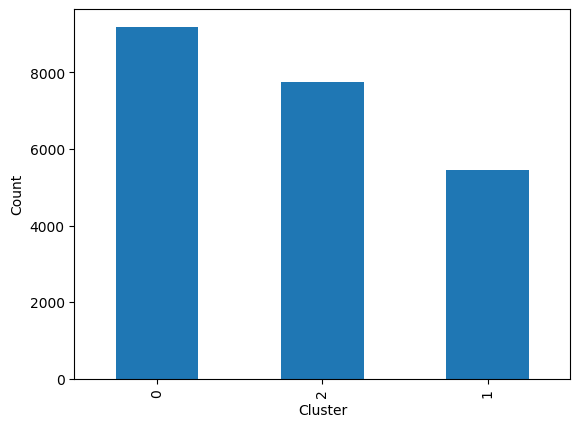

In [222]:
df_original['KMeans_Cluster'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Cluster')

## GROUPBY CLUSTERS-ESTADO

In [223]:
df_orinigal_estado = df_original.groupby('KMeans_Cluster')['ESTADO'].value_counts()
df_orinigal_estado

KMeans_Cluster  ESTADO               
0               Orden en Proceso         4533
                Recibido                 2876
                Cancelado                 646
                Orden Rechazada           596
                Finalizado Incompleto     356
                Recibido Parcial          125
                Pendiente por Aprobar      30
                Orden Confirmada           15
                Enviado                    11
1               Recibido                 5443
2               Recibido                 5873
                Finalizado Incompleto     580
                Cancelado                 493
                Orden Rechazada           416
                Orden en Proceso          339
                Recibido Parcial           38
                Pendiente por Aprobar      21
                Enviado                     1
Name: ESTADO, dtype: int64

In [224]:
plt.style.use('default')

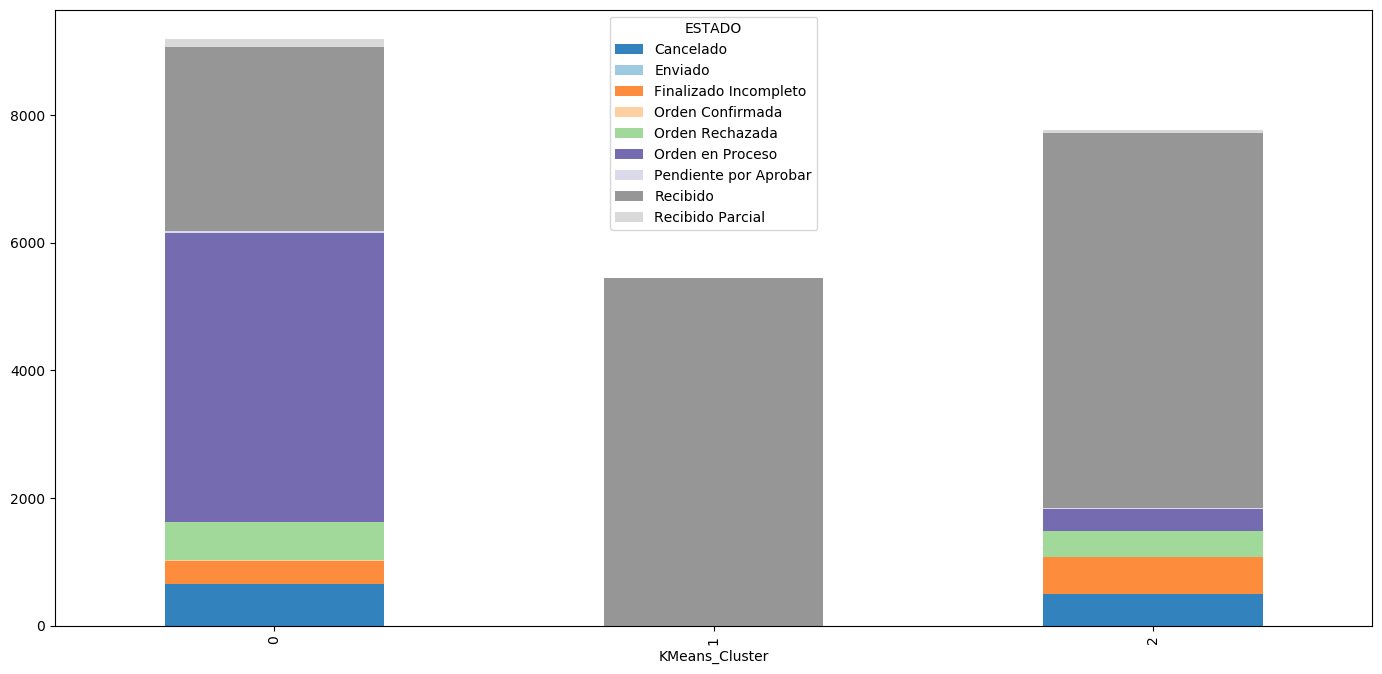

In [225]:
df_orinigal_estado.unstack().plot(kind='bar', stacked=True, figsize=(17,8),cmap=plt.get_cmap('tab20c'))

In [226]:
df_orinigal_estado1 = df_original.groupby('ESTADO')['KMeans_Cluster'].value_counts()
df_orinigal_estado1

ESTADO                 KMeans_Cluster
Cancelado              0                  646
                       2                  493
Enviado                0                   11
                       2                    1
Finalizado Incompleto  2                  580
                       0                  356
Orden Confirmada       0                   15
Orden Rechazada        0                  596
                       2                  416
Orden en Proceso       0                 4533
                       2                  339
Pendiente por Aprobar  0                   30
                       2                   21
Recibido               2                 5873
                       1                 5443
                       0                 2876
Recibido Parcial       0                  125
                       2                   38
Name: KMeans_Cluster, dtype: int64

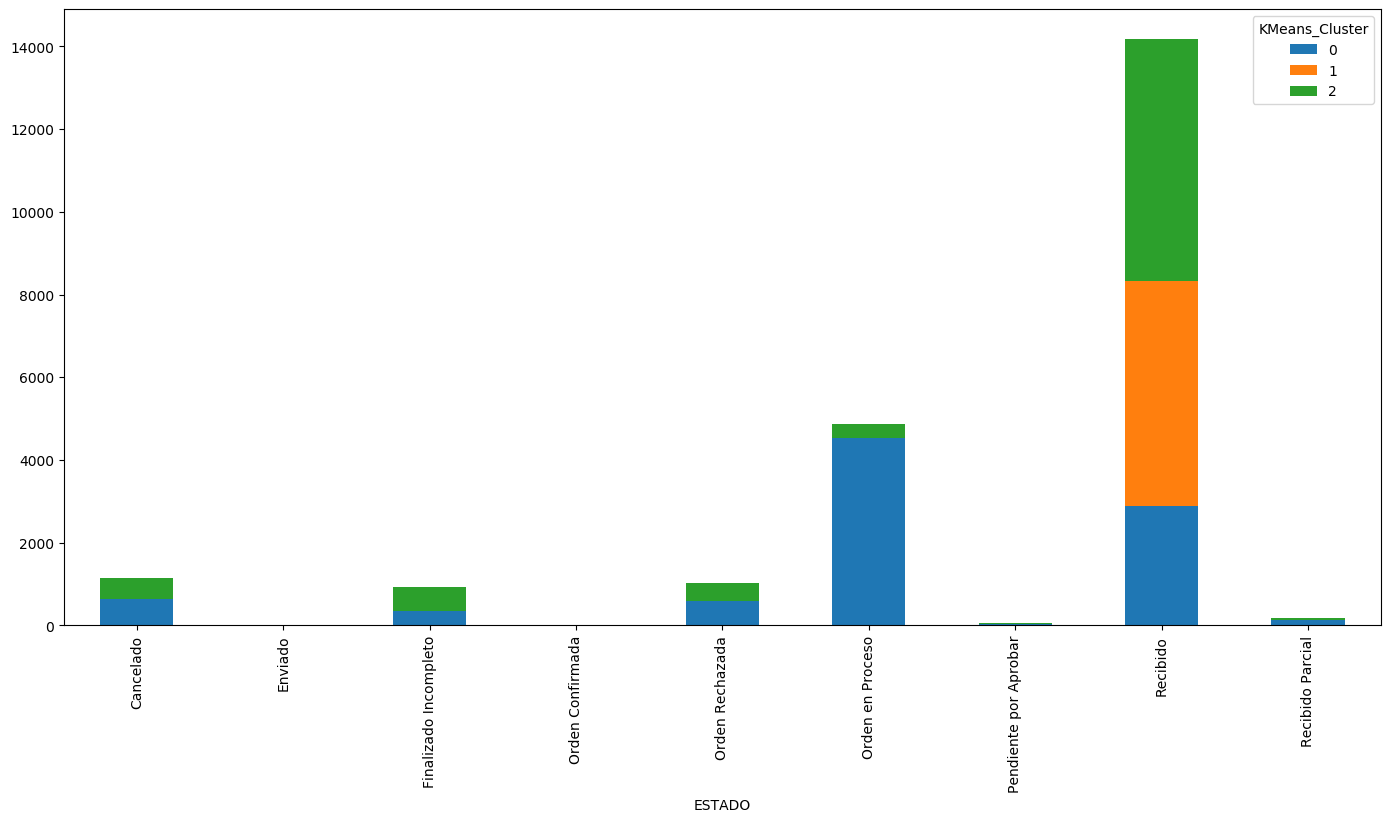

In [227]:
df_orinigal_estado1.unstack().plot(kind='bar', stacked=True, figsize=(17,8))

## GROUPBY CLUSTERS-TOTAL+IVA

In [228]:
df_original.groupby('KMeans_Cluster').agg({'TOTAL_+_IVA':['mean', 'sum']})

TOTAL_+_IVA            
                               mean         sum
KMeans_Cluster                                 
0                        436,970.62  4014886073
1                        939,382.31  5113057930
2                        417,313.96  3238773664

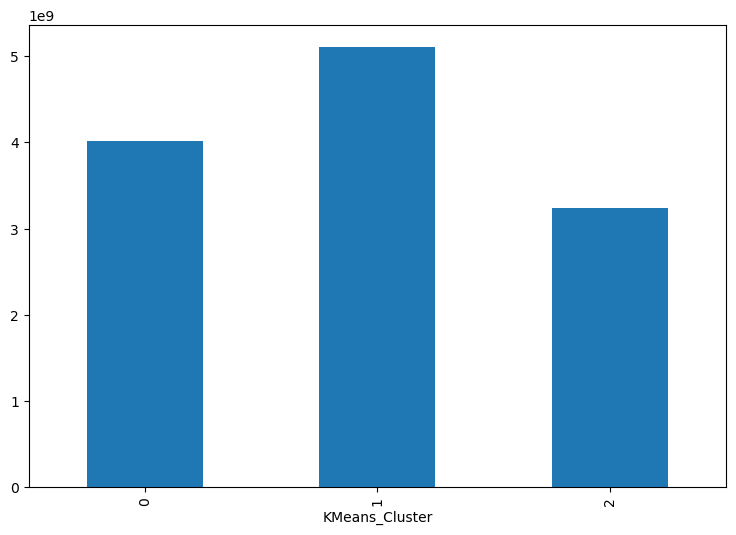

In [229]:
df_original.groupby('KMeans_Cluster')['TOTAL_+_IVA'].sum().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-QUANTITY "PROVEEDORES"

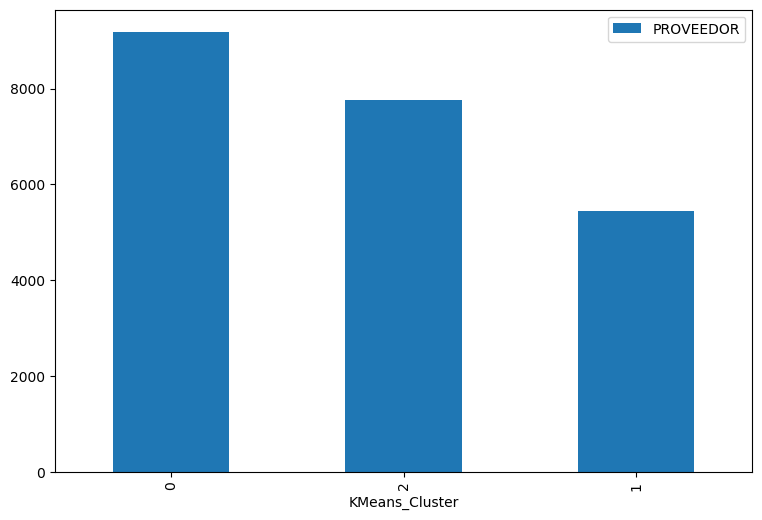

In [230]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [231]:
df_original.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
       'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
       'KMeans_Cluster'],
      dtype='object')

## GROUPBY CLUSTER-COMPANHIA COMPRADORA

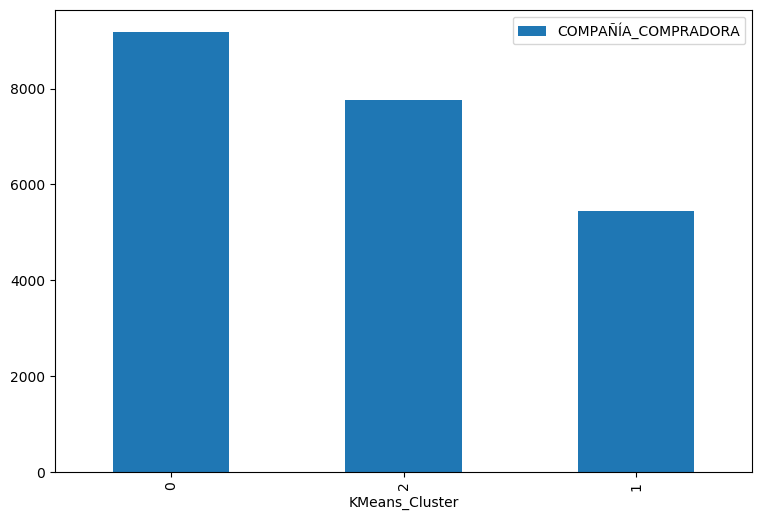

In [232]:
df_original.groupby('KMeans_Cluster').agg({'COMPAÑÍA_COMPRADORA':'count'}).sort_values(by='COMPAÑÍA_COMPRADORA',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [233]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack()

COMPAÑÍA_COMPRADORA                Otros   Portal comprador 1  \
KMeans_Cluster                                                  
0                               2,361.00                47.00   
1                                   4.00                  NaN   
2                                 842.00             6,516.00   

COMPAÑÍA_COMPRADORA   Portal comprador 2  Portal comprador 24  \
KMeans_Cluster                                                  
0                               3,460.00                  NaN   
1                                    NaN             5,439.00   
2                                 403.00                  NaN   

COMPAÑÍA_COMPRADORA  Portal comprador 29  
KMeans_Cluster                            
0                               3,320.00  
1                                    NaN  
2                                    NaN

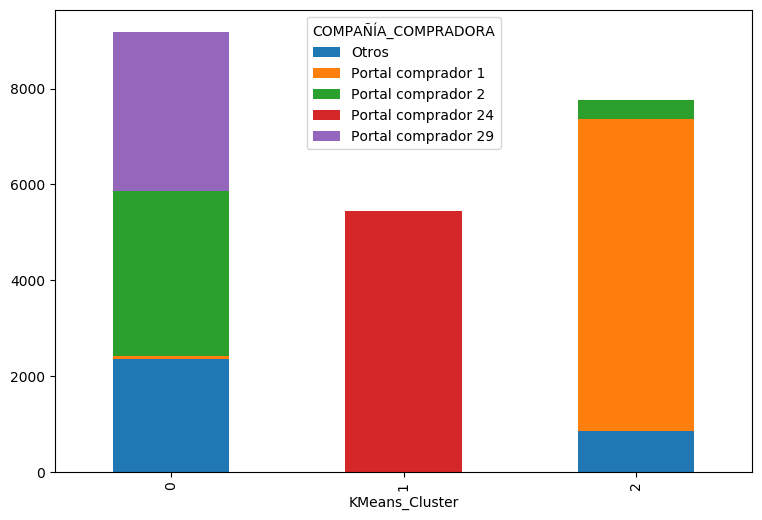

In [234]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-COMPANHIA PROVEEDOR

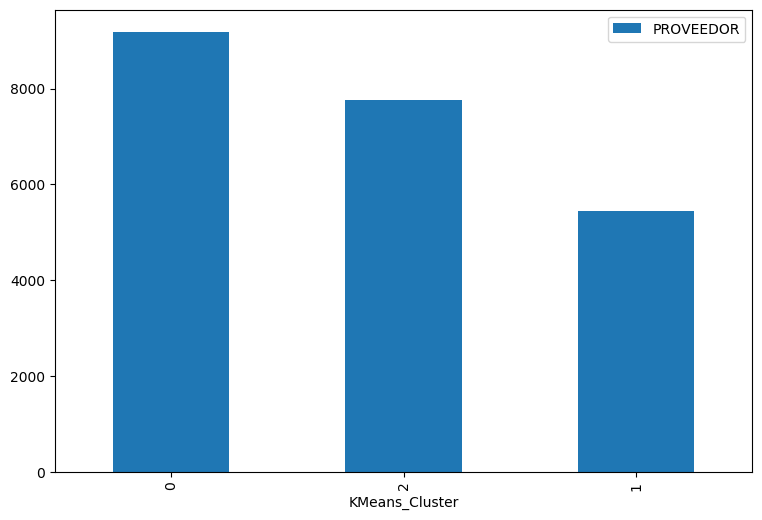

In [235]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

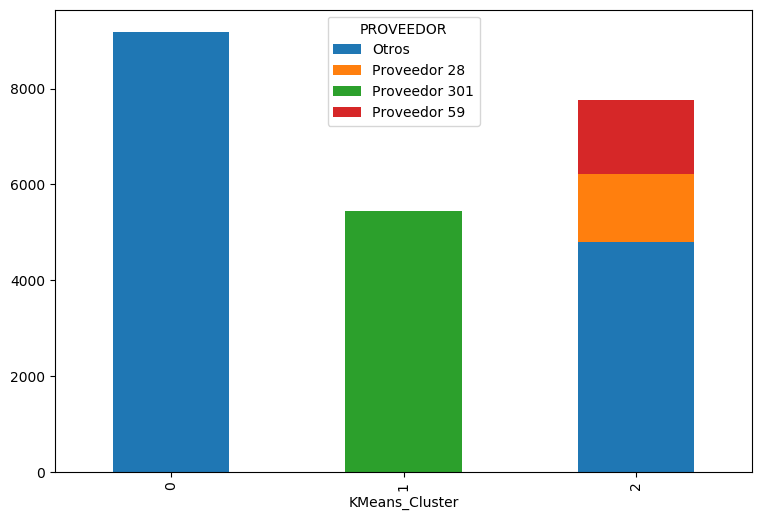

In [236]:
df_original.groupby('KMeans_Cluster')['PROVEEDOR'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

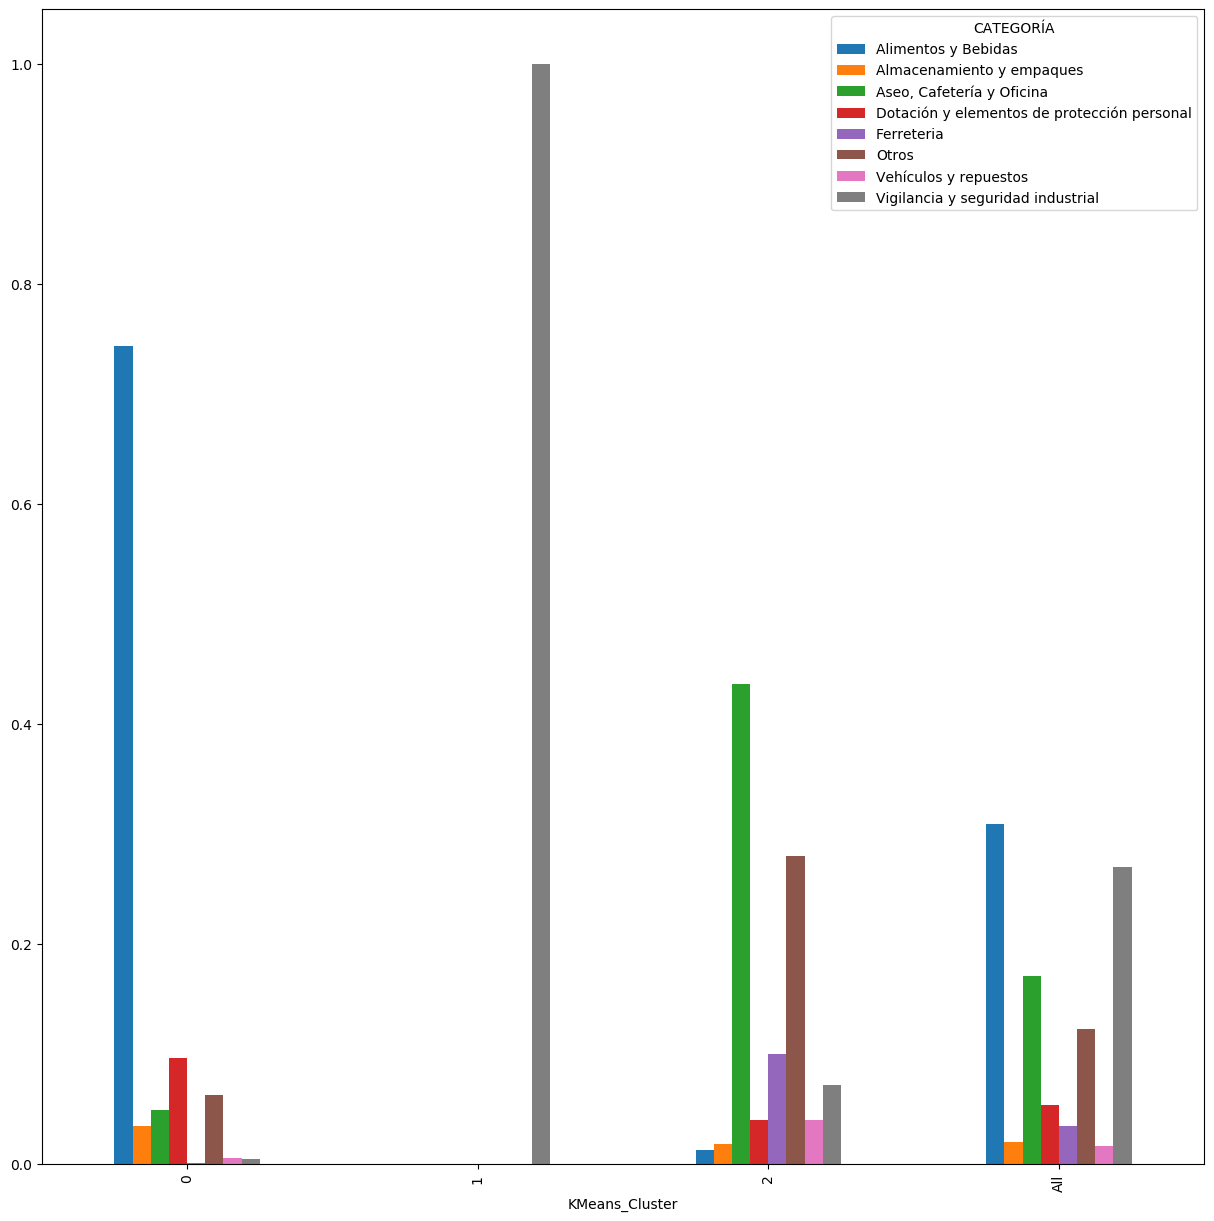

In [237]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index').plot(kind='bar', figsize=(15,15), )

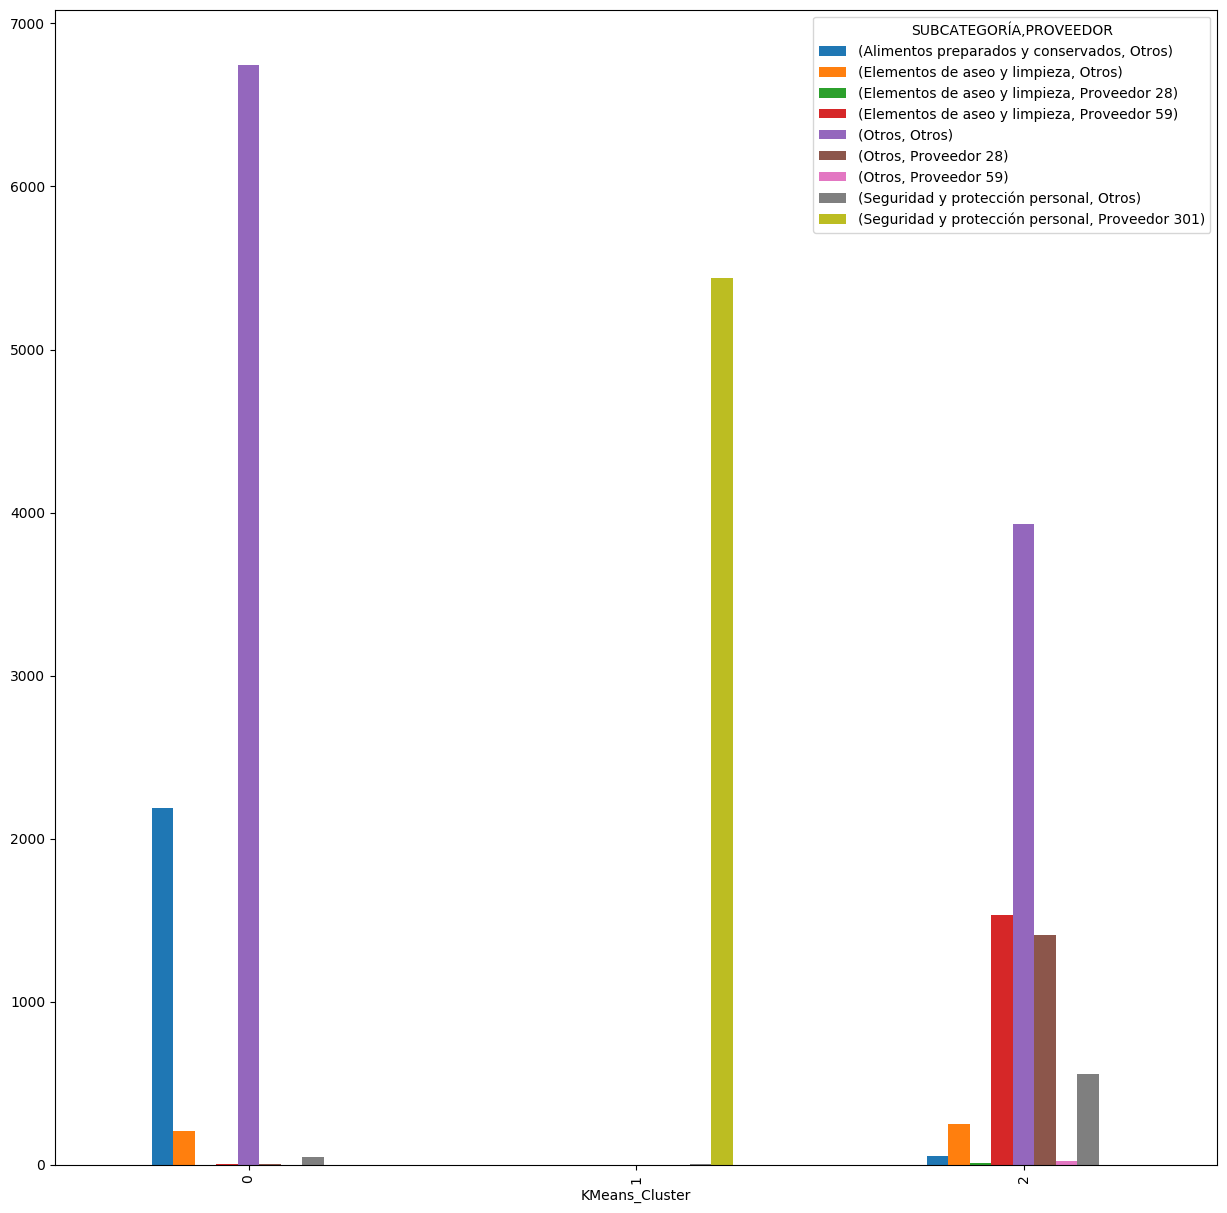

In [238]:
pd.crosstab(df_original['KMeans_Cluster'], [df_original['SUBCATEGORÍA'] , df_original['PROVEEDOR']]).plot(kind='bar', figsize=(15,15))

In [239]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xlsx', index=False)

In [240]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            22392 non-null  int64         
 1   ORDEN_NÚMERO             22392 non-null  int64         
 2   CATEGORÍA                22392 non-null  object        
 3   SUBCATEGORÍA             22392 non-null  object        
 4   PROVEEDOR                22392 non-null  object        
 5   PRESUPUESTO              22392 non-null  object        
 6   COMPAÑÍA_COMPRADORA      22392 non-null  object        
 7   ESTADO                   22392 non-null  object        
 8   CANTIDAD_PEDIDA          22392 non-null  float64       
 9   CANTIDAD_RECIBIDA        22392 non-null  float64       
 10  PRECIO_UNITARIO          22392 non-null  int64         
 11  PRECIO_UNITARIO_+_IVA    22392 non-null  int64         
 12  IVA                      22392 n

In [241]:
df_original.select_dtypes(['float', 'int', 'int64', 'float64', 'int32']).columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'KMeans_Cluster'],
      dtype='object')

In [242]:
df = df_original
px.parallel_coordinates(df, color="KMeans_Cluster", labels={"KMeans_Cluster": "clusters",
                   "CANTIDAD_PEDIDA": "CANTIDAD_PEDIDA", "CANTIDAD_RECIBIDA": "CANTIDAD_RECIBIDA",
                   "PRECIO_UNITARIO": "PRECIO_UNITARIO", "DURACIÓN_ENTREGA": "DURACIÓN_ENTREGA",
                    },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
# fig.show()

In [243]:
px.scatter(df_original, x='CANTIDAD_PEDIDA', y='TOTAL_+_IVA', color='KMeans_Cluster')

In [244]:
px.scatter(df_original, x='CANTIDAD_PEDIDA', y='TOTAL_+_IVA', color='KMeans_Cluster')

## DESCRIPTION OF THE CLUSTERS

In [245]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [246]:
df.groupby('KMeans_Cluster').sum()

NÚMERO_PEDIDO  ORDEN_NÚMERO      CANTIDAD_PEDIDA  \
KMeans_Cluster                                                     
0                   233822697       4785865         3,707,180.43   
1                   189442246       2482445           231,201.00   
2                   363161258       8590793           465,666.20   

                  CANTIDAD_RECIBIDA  PRECIO_UNITARIO  PRECIO_UNITARIO_+_IVA  \
KMeans_Cluster                                                                
0                        429,896.76        269174584              306022340   
1                        231,201.00        217250633              258514916   
2                        447,823.30       1172269088             1351658492   

                      IVA  TOTAL_+_IVA     DURACIÓN_ENTREGA  \
KMeans_Cluster                                                
0                36847764   4014886073            44,373.96   
1                41264177   5113057930                 6.48   
2               179389412   3238773664            28,205.95   

                DURACIÓN_APROBACIÓN  
KMeans_Cluster                       
0                         24,566.72  
1                        261,655.00  
2                         13,126.85

## METRICS

In [247]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

# kprototipes

In [248]:
data = df.iloc[: , :-1]

### SILHUOETTE

In [249]:
model_KMeans = clustering

In [250]:
metrics.silhouette_score(data, clustering.labels_)

ValueError: could not convert string to float: 'Otros'

### AGGLOMERATIVE

In [ ]:
model_AGGLOMERATIVE = AgglomerativeClustering(n_clusters = 3).fit(data)

In [ ]:
metrics.silhouette_score(data, model_AGGLOMERATIVE.labels_)

### BIRCH

In [ ]:
model_BIRCH = Birch(n_clusters=3).fit(data)

In [ ]:
metrics.silhouette_score(data, model_BIRCH.labels_)

### MINIBATCHKMEANS

In [ ]:
model_MINIBATCHKMEANS = MiniBatchKMeans(n_clusters=3, max_iter=300, batch_size=20).fit(data)

In [ ]:
metrics.silhouette_score(data, model_MINIBATCHKMEANS.labels_)

### PUT THE CLUSTER COLUMN TO GRAPH

In [ ]:
df['KMeans_Cluster'] = model_KMeans.labels_

In [ ]:
df.groupby('KMeans_Cluster').mean()

## PCA TO TAKE A LOOK OF THE CLUSTER

In [ ]:
from sklearn.decomposition import  PCA

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

In [ ]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [ ]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)